# R로 만들 수 있는 그래프

- 2차원 그래프, 3차원 그래프

- 지도 그래프

- 네트워크 그래프

- 모션 차트
  - 시간에 따른 데이터의 움직임을 보여주는 차트

- 인터랙티브 그래프
 - 마우스 조작에 반응하는 차트

## 산점도 만들기

- 산점도(Scatter Plot) : 데이터를 x축과 y축에 점으로 표현한 그래프

- 나이와 소득처럼, 연속 값으로 된 두 변수의 관계를 표현할 때 사용

In [1]:
library(ggplot2)

-- ggplot2 문법구조 : <br>

1단계 : 배경 설정<br>

2단계 : 그래프 추가<br>

3단계 : 설정 추가(축 범위, 색, 표식)

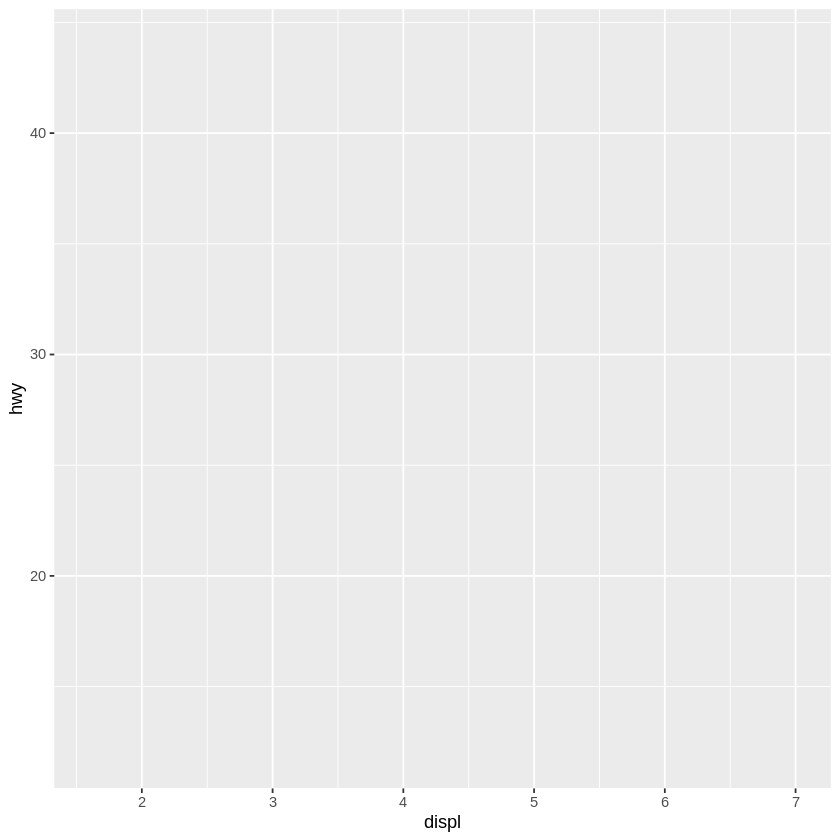

In [2]:
# x축은 displ, y축은 hwy로 지정해 배경 생성
ggplot(data = mpg, aes(x = displ, y = hwy))

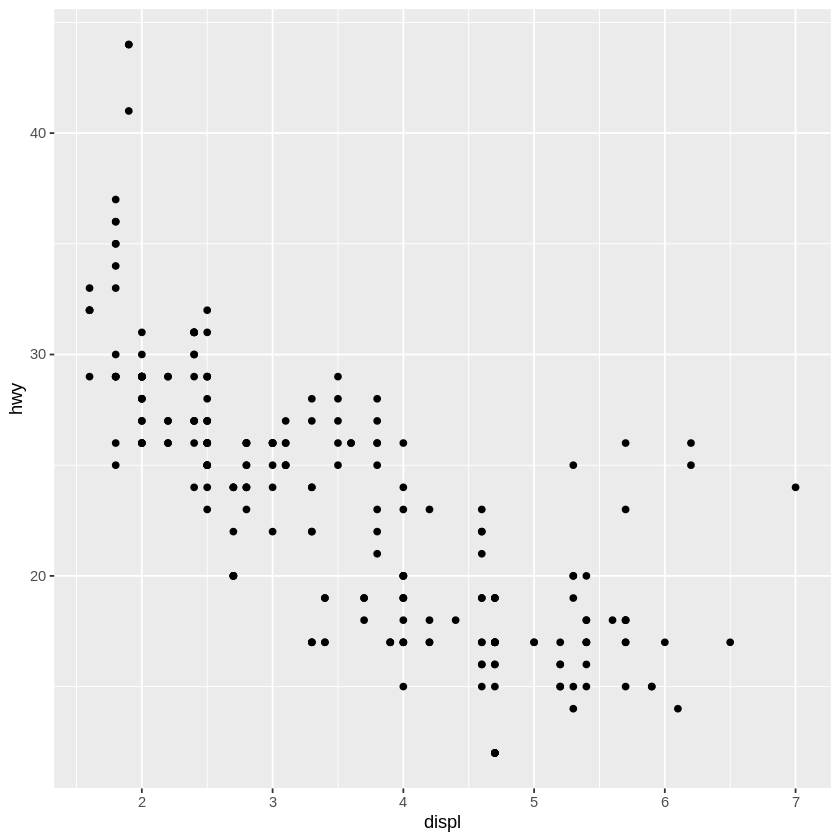

In [3]:
# 배경에 산점도 추가
ggplot(data = mpg, aes(x = displ, y = hwy)) + geom_point()

Warning message:
“Removed 105 rows containing missing values (geom_point).”


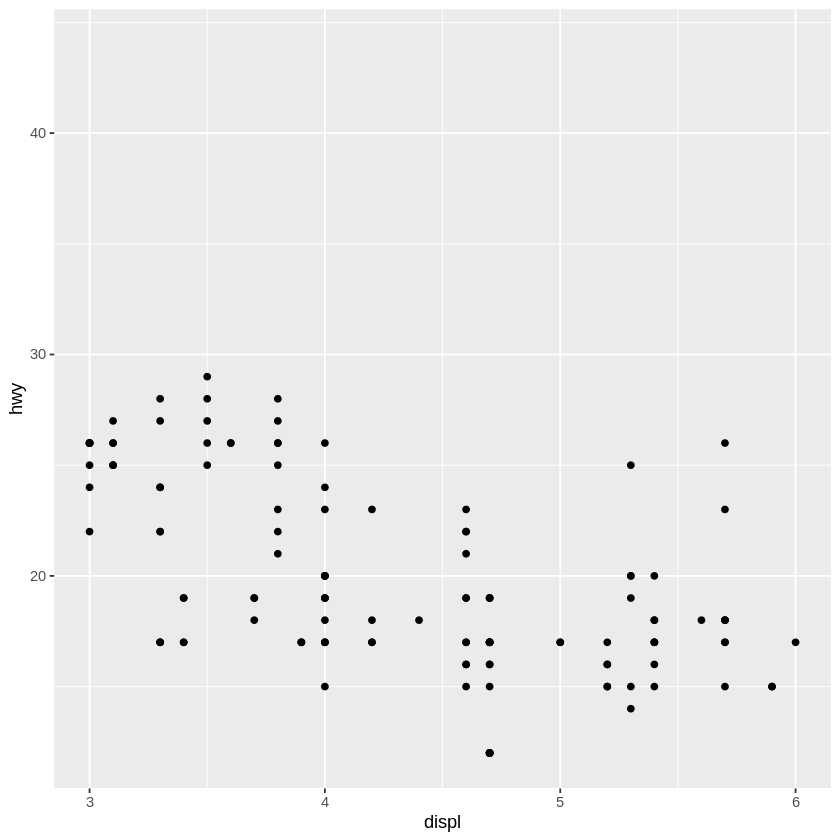

In [4]:
# x축 범위 3 ~ 6으로 지정
ggplot(data = mpg, aes(x = displ, y = hwy)) + geom_point() + xlim(3, 6)

Warning message:
“Removed 105 rows containing missing values (geom_point).”


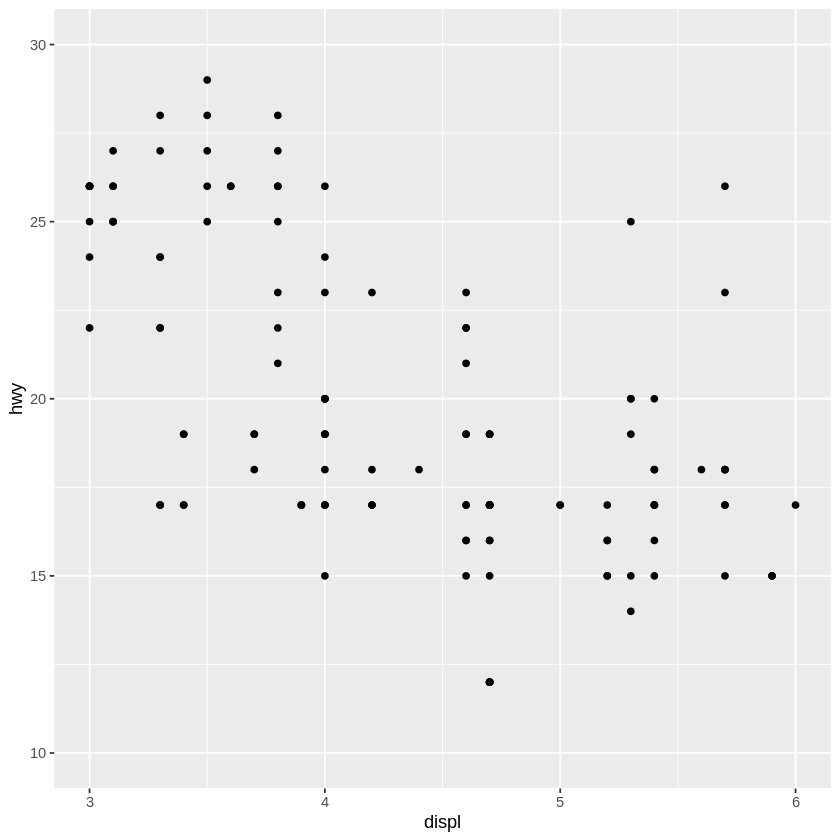

In [6]:
# x축 범위 3 ~ 6, y축 범위 10 ~ 30으로 지정
ggplot(data = mpg, aes(x = displ, y = hwy)) + 
  geom_point() +
  xlim(3, 6) +
  ylim(10, 30)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



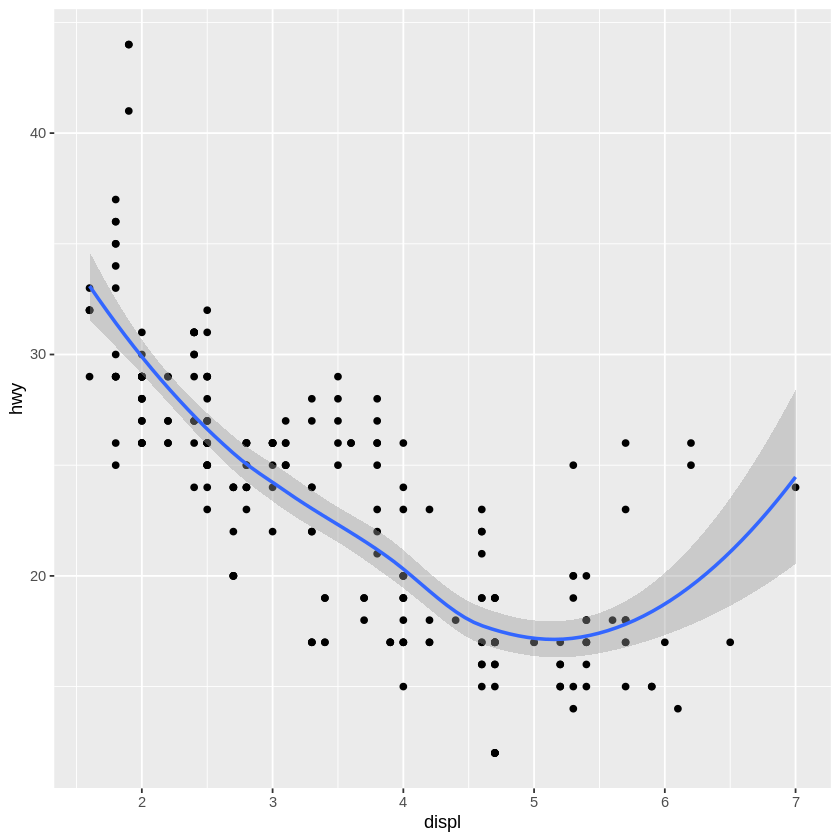

In [9]:
# 추세선 추가
ggplot(data = mpg, aes(x = displ, y = hwy)) +
  geom_point() +
  stat_smooth()

### qplot()과 ggplot()

- qplot() : 문법이 간단하지만 기능이 적기 때문에 주로 전처리 단계에서 빠르게 데이터를 확인하는 용도로 활용

- ggplot() : 최종 분석 결과 보고용 그래프를 만들 때 사용. 그래프의 세부 요소들을 자유롭게 조절할 수 있음

### 그래프 그리기 연습

1. mpg 데이터에서 x축은 cty, y축은 hwy로 된 산점도 그리기

2. midwest 데이터에서 x축은 poptotal, y축은 popasian으로 된 산점도 그리기. 단, poptotal은 50만명 이하, popasian은 1만명 이하인 지역만 표시되도록.

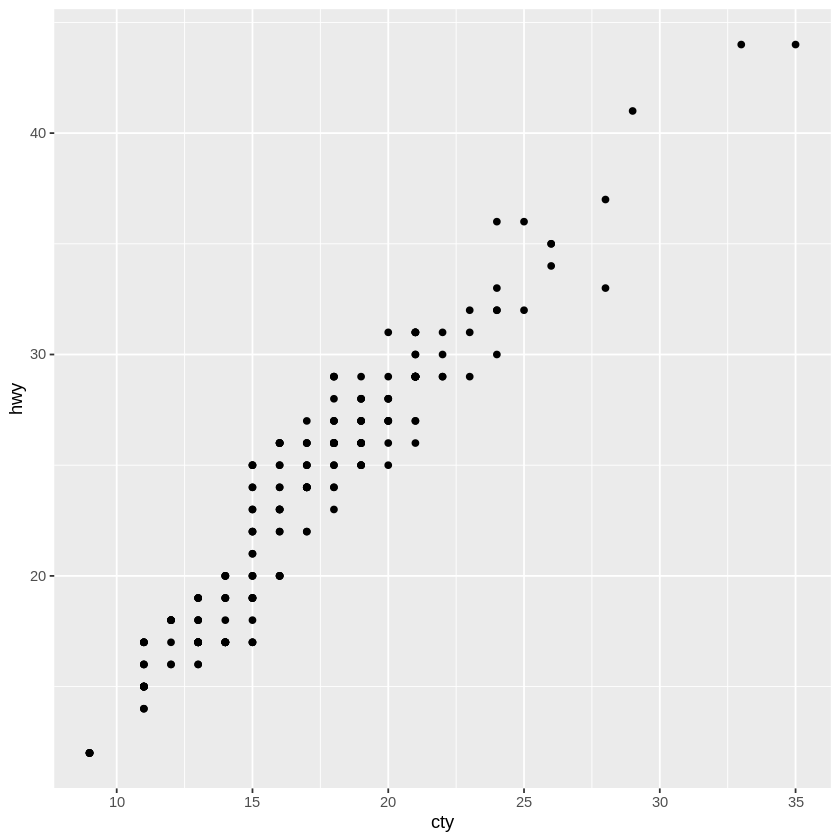

In [16]:
# mpg 데이터에서 x축은 cty, y축은 hwy로 된 산점도 그리기
ggplot(data = mpg, aes(x = cty, y = hwy)) +
  geom_point()

Warning message:
“Removed 15 rows containing missing values (geom_point).”


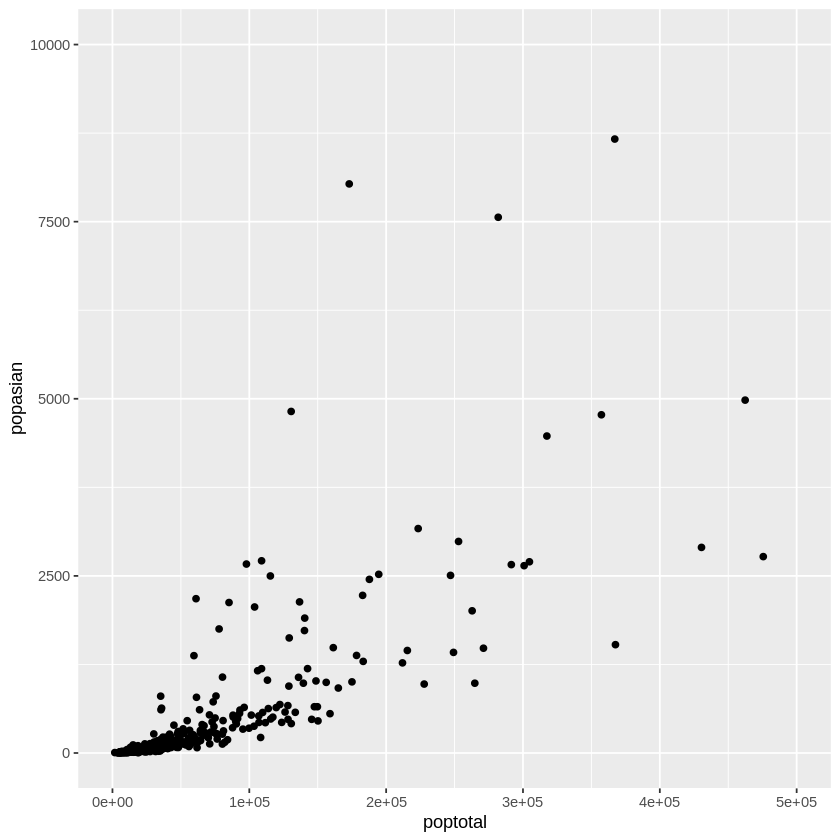

In [18]:
# 2. midwest 데이터에서 x축은 poptotal, y축은 popasian으로 된 산점도 그리기. 단, poptotal은 50만명 이하, popasian은 1만명 이하인 지역만 표시되도록
ggplot(data = midwest, aes(x = poptotal, y = popasian)) +
  geom_point() +
  xlim(0, 500000) +
  ylim(0, 10000)

## 막대 그래프

- 막대 그래프(Bar Chart)

 - 데이터의 크기를 막대의 길이로 표현한 그래프

 - 성별 소득 차이처럼 집단 간 차이를 표현할 때 주로 사용

In [19]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [21]:
# 평균 막대 그래프
# mpg 데이터를 이용해 drv별 평균 hwy 막대 그래프 만들기

mpg <- as.data.frame(ggplot2::mpg)

df_mpg <- mpg %>%
  group_by(drv) %>%
  summarise(mean_hwy = mean(hwy))

df_mpg

drv,mean_hwy
<chr>,<dbl>
4,19.17476
f,28.16038
r,21.00000


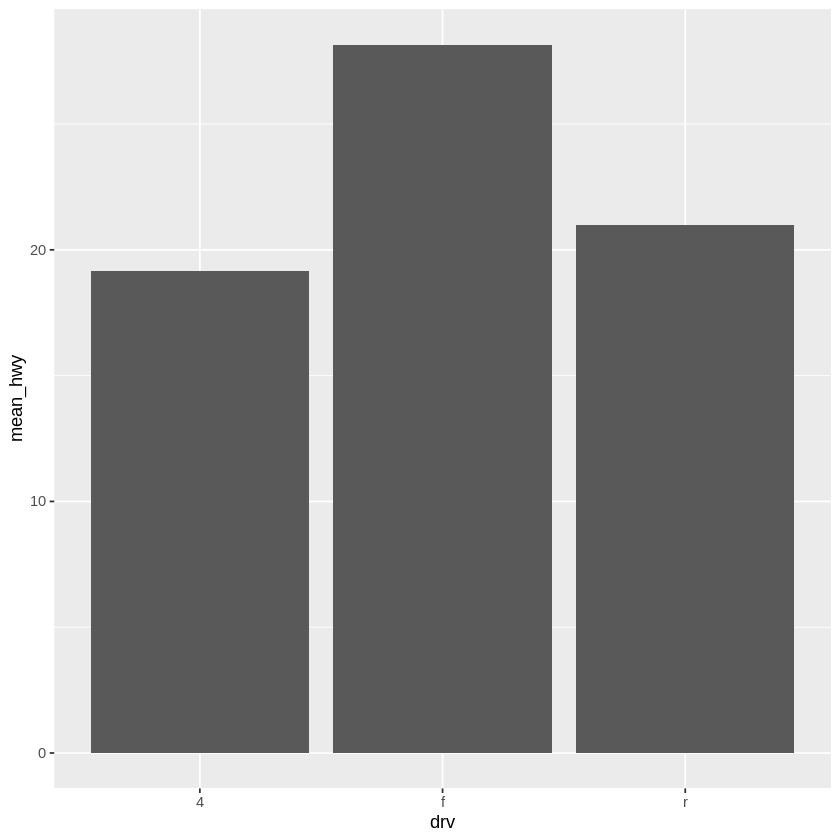

In [22]:
# 그래프 그리기
ggplot(data = df_mpg, aes(x = drv, y = mean_hwy)) +
  geom_col()

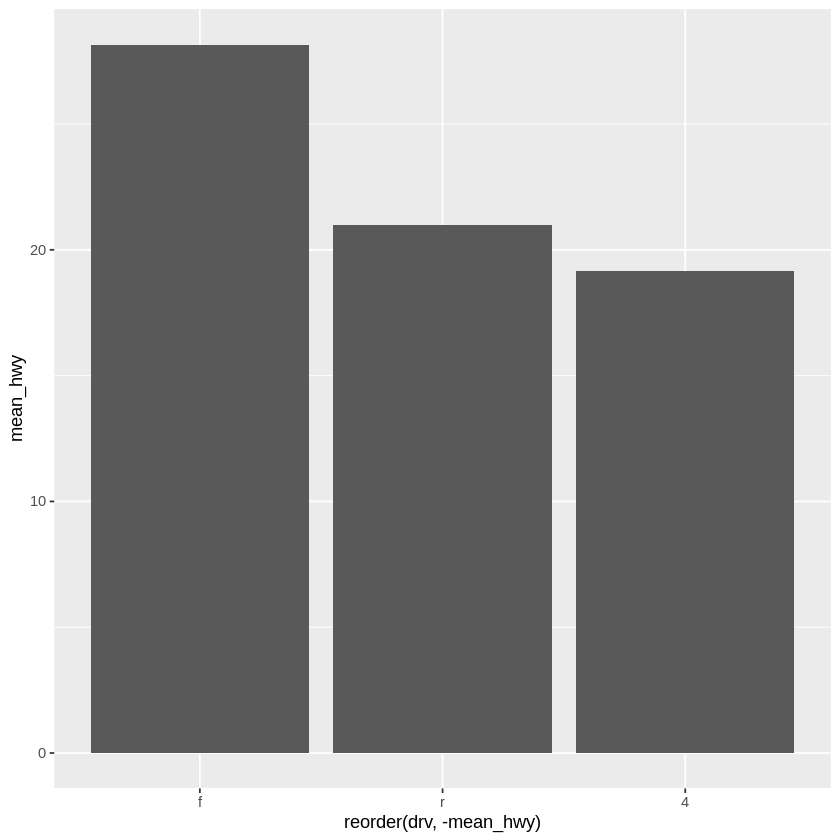

In [23]:
# 크기 순으로 정렬하기
ggplot(data = df_mpg, aes(x = reorder(drv, -mean_hwy), y = mean_hwy)) +
  geom_col()